In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import datetime

import pandas_profiling 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statistics import mean
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from functools import reduce
import warnings
import itertools
from functools import reduce
from scipy.stats import zscore
from time import time
from sklearn.impute import SimpleImputer
si=SimpleImputer()
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score
lr=LinearRegression()
dt=DecisionTreeRegressor()
svm=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
bag=BaggingRegressor()
xtree=ExtraTreesRegressor()




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
stores_1 = pd.read_csv(io.BytesIO(uploaded['stores.csv']))
walmart_sales = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_set = pd.read_csv(io.BytesIO(uploaded['test.csv']))
walmart_features = pd.read_csv(io.BytesIO(uploaded['features.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
stores_1.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
walmart_sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test_set.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
walmart_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
data=pd.merge(walmart_sales,walmart_features,on=['Store','Date','IsHoliday'],how='inner')
data=data.merge(stores_1)


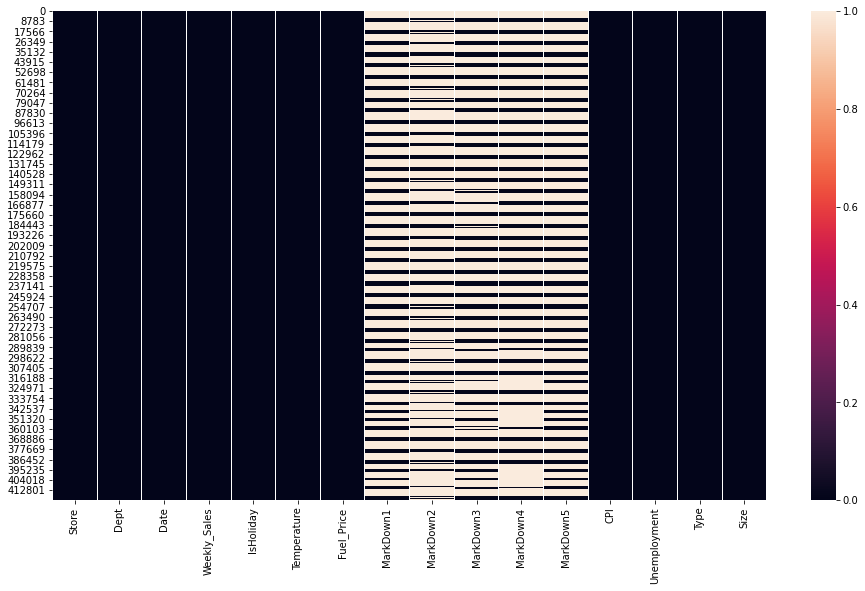

In [ ]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.000000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.452000,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.318780,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.866000,8.572000,14.313000
Type,421570.0,0.589912,0.666337,0.000,0.000000,0.000000,1.000000,2.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
data.isnull().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

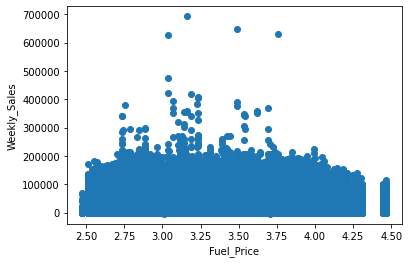

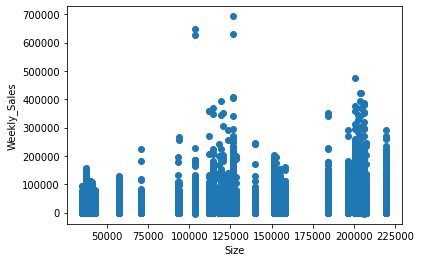

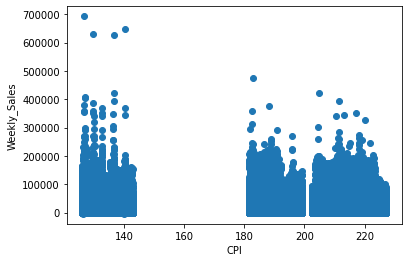

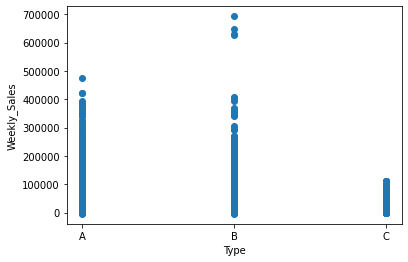

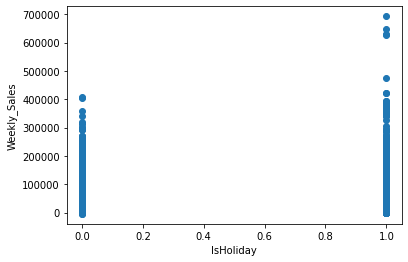

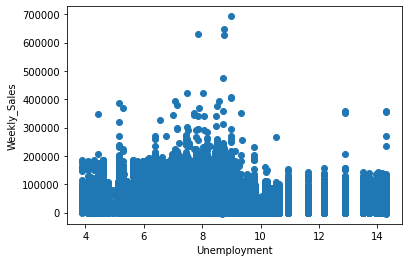

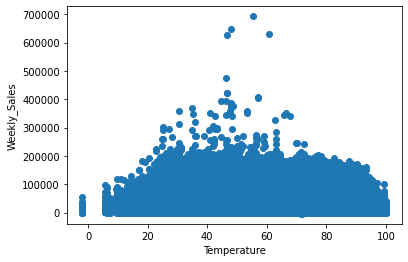

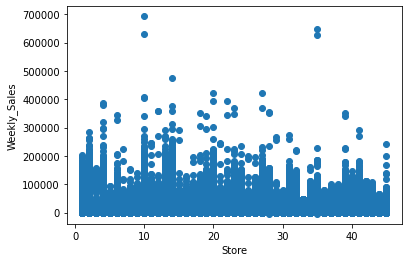

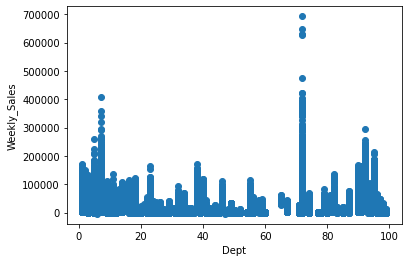

In [ ]:
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')
scatter(data, 'Dept')

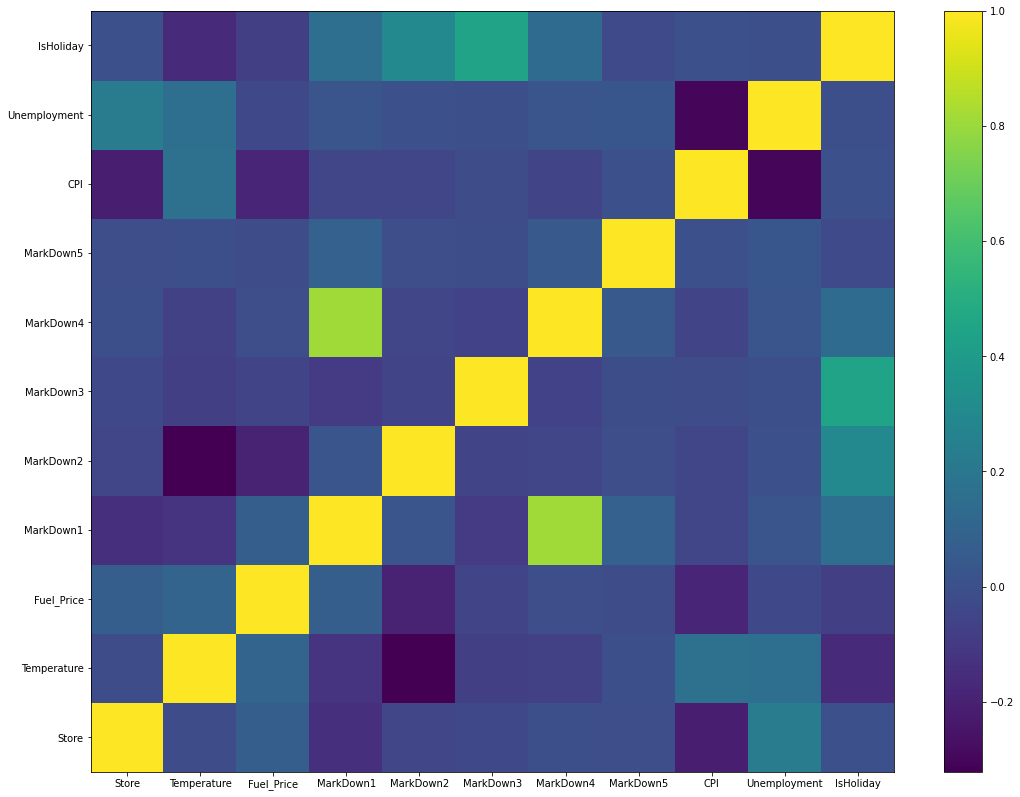

In [ ]:
fig = plt.figure(figsize=(18, 14))
corr = walmart_features.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [ ]:
data['Day']=pd.to_datetime(data['Date']).dt.day
data['Month']=pd.to_datetime(data['Date']).dt.month
data['Year']=pd.to_datetime(data['Date']).dt.year
del data['Date']
data['IsHoliday']=le.fit_transform(data['IsHoliday'])
data['Type']=le.fit_transform(data['Type'])

In [ ]:
data=pd.concat([data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1),
                pd.DataFrame(si.fit_transform(data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),
                             columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])],axis=1)

In [ ]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Month,Year,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  int64  
 9   Size          421570 non-null  int64  
 10  Day           421570 non-null  int64  
 11  Month         421570 non-null  int64  
 12  Year          421570 non-null  int64  
 13  MarkDown1     421570 non-null  float64
 14  MarkDown2     421570 non-null  float64
 15  MarkDown3     421570 non-null  float64
 16  MarkDown4     421570 non-null  float64
 17  MarkDown5     421570 non-null  float64
dtypes: f

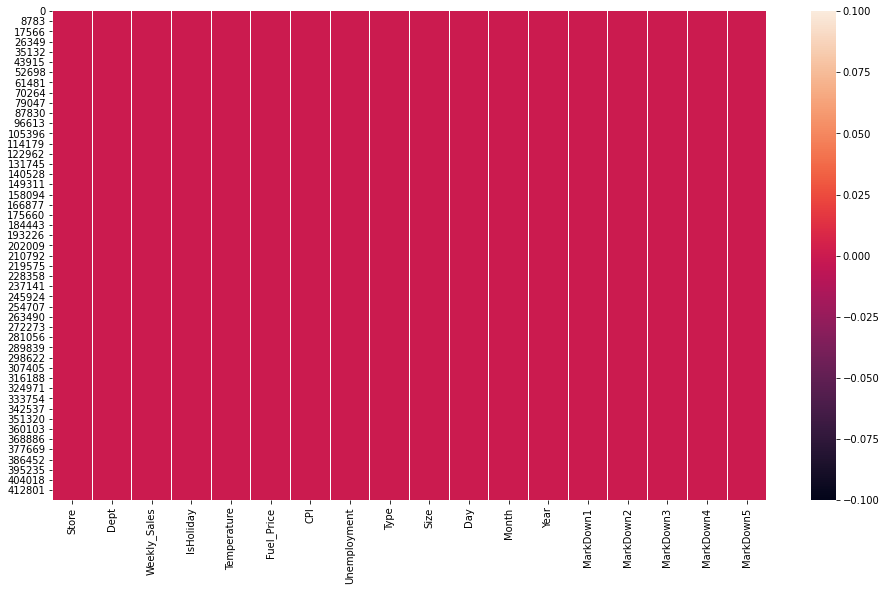

In [ ]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())

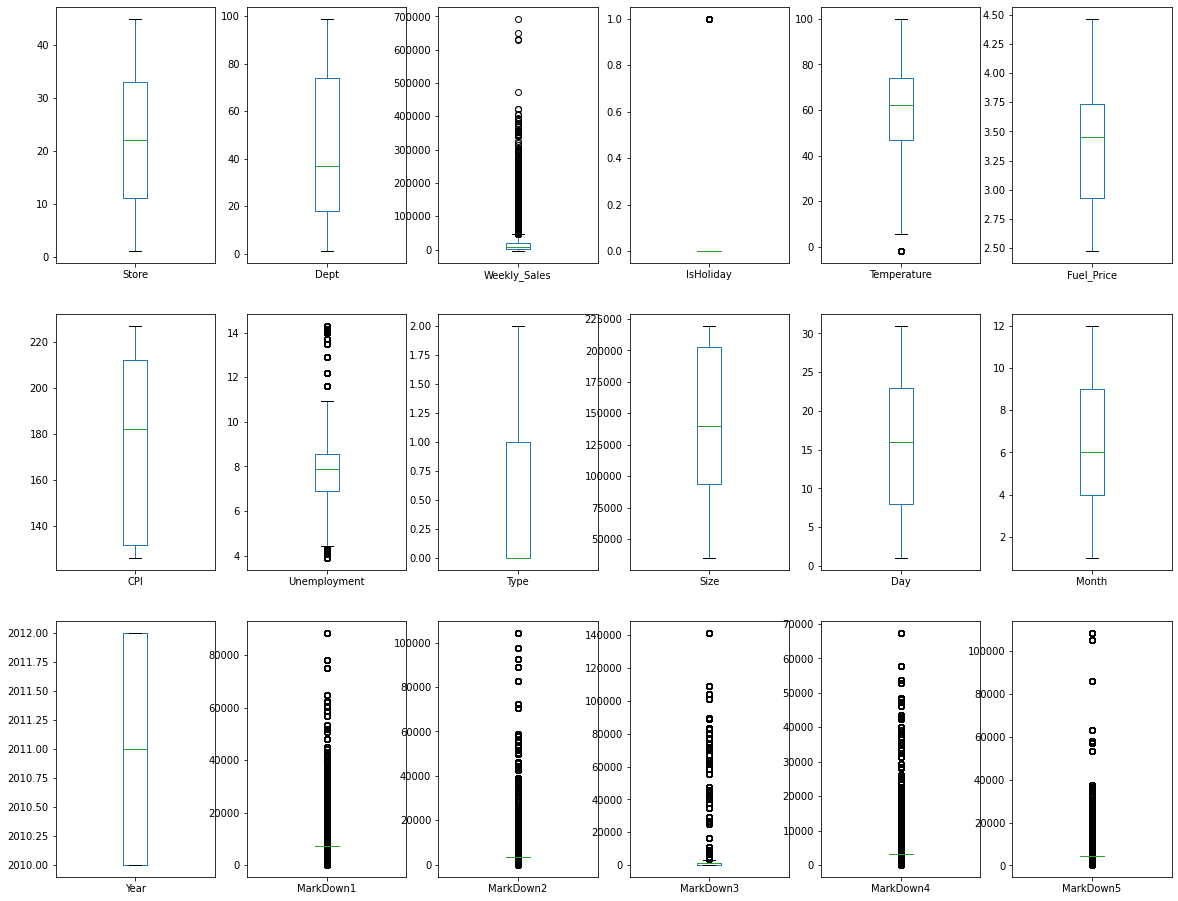

In [ ]:
data.plot(kind='box',layout=(3,6),subplots=1,figsize=(20,16))
plt.show()

In [ ]:
#Independent and Dependent Variable Segregation
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
x=x.apply(zscore)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [ ]:
start_time=time()
model_list=[lr,dt,knn,rf,ada,bag,xtree]
Score=[]
for i in model_list:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=r2_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','R2-Score']))
end_time=time()
print(round(end_time-start_time,2),'sec')


                                          Model Used  R2-Score
0  LinearRegression(copy_X=True, fit_intercept=Tr...  0.090295
1  DecisionTreeRegressor(ccp_alpha=0.0, criterion...  0.953271
2  KNeighborsRegressor(algorithm='auto', leaf_siz...  0.207817
3  (DecisionTreeRegressor(ccp_alpha=0.0, criterio...  0.973227
4  (DecisionTreeRegressor(ccp_alpha=0.0, criterio... -0.034000
5  (DecisionTreeRegressor(ccp_alpha=0.0, criterio...  0.970986
6  (ExtraTreeRegressor(ccp_alpha=0.0, criterion='...  0.972551
841.0 sec


In [ ]:
#better accuracy for Random Forest.
param={'n_estimators':range(1,10)}
gridsearch=GridSearchCV(rf,param_grid=param,return_train_score=True)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

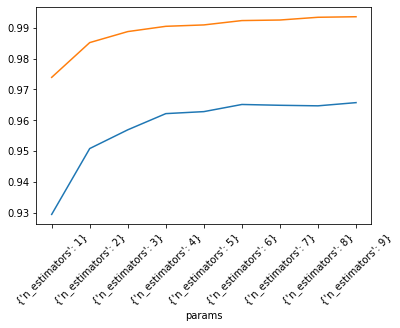

In [ ]:
pd.DataFrame(gridsearch.cv_results_).set_index('params')['mean_test_score'].plot.line()
pd.DataFrame(gridsearch.cv_results_).set_index('params')['mean_train_score'].plot.line()
plt.xticks(rotation=45)

In [ ]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Day', 'Month',
       'Year', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5'],
      dtype='object')

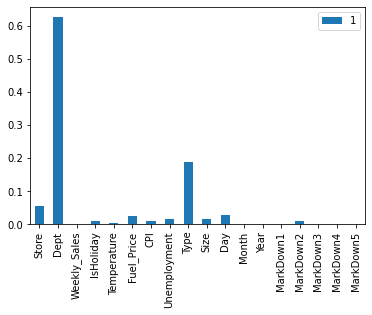

In [ ]:
(pd.DataFrame([data.columns,rf.feature_importances_],columns=['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Day', 'Month',
       'Year', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']).T).plot.bar()